In [1]:
import pandas as pd
import numpy as np
import copy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
def func(n, links, target, param, dim_red_method):
    labels = pd.read_csv(target, sep=";")
    
    ind_1 = labels.loc[labels['target'] == 'D'].index
    ind_2 = labels.loc[labels['target'] == 'C'].index
    ind = []
    ind.extend(ind_1)
    ind.extend(ind_2)
    all_d_cent = []
    all_c_cent = []
    
    images = []
    distance = 0
    for i in range(n):
        data = pd.read_csv(links[i])
        new_data = pd.DataFrame(data, index=ind)
        
        data_red = dim_red_method.fit_transform(new_data)
        
        d_dots = []
        c_dots = []
        indexes = new_data.index.tolist()
        for i in new_data.index:
            if i in ind_1:
                d_dots.append(data_red[indexes.index(i)])
            if i in ind_2:
                c_dots.append(data_red[indexes.index(i)])
                
        d_x = []
        d_y = []
        c_x = []
        c_y = []

        for i in d_dots:
            d_x.append(i[0])
            d_y.append(i[1])
        d_coor = [d_x, d_y]
    
        for j in c_dots:
            c_x.append(j[0])
            c_y.append(j[1])
        c_coor = [c_x, c_y]
        
        images.append((d_coor, c_coor))
        
        
        d_center = [sum(d_x)/len(d_x), sum(d_y)/len(d_y)] 
        c_center = [sum(c_x)/len(c_x), sum(c_y)/len(c_y)] 
        all_d_cent.append(d_center)
        all_c_cent.append(c_center)
        
        distance += ((d_center[0] - c_center[0])*(d_center[0] - c_center[0]) + 
                (d_center[1] - c_center[1])*(d_center[1] - c_center[1]))
    
    #return distance/3 
    
    if param == 'vertically':
        fig, ax = plt.subplots(nrows=n, ncols=1)
        fig.set_size_inches(3, n * 3)
        
    else:
        fig, ax = plt.subplots(nrows=1, ncols=n)
        fig.set_size_inches(n * 3, 3)
    if n > 1:    
        for j in range(n): 
            ax[j].scatter(images[j][0][0], images[j][0][1], c='r')
            ax[j].scatter(images[j][1][0], images[j][1][1], c='g')
            
            ax[j].scatter(all_d_cent[j][0], all_d_cent[j][1], c='y')
            ax[j].scatter(all_c_cent[j][0], all_c_cent[j][1], c='b')
            
            ax[j].set_title('emdeddings ' + str(3 + j * 2))
            ax[j].set_xticks([])
            ax[j].set_yticks([])
    else:
        ax.scatter(images[0][0][0], images[0][0][1], c='r')
        ax.scatter(images[0][1][0], images[0][1][1], c='g')
        ax.set_title('emdeddings 7')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig('MiniBatchDictionaryLearning' +'.png', format='png', dpi=100)
    plt.show()


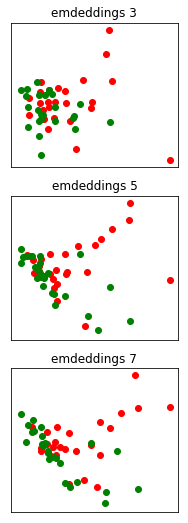

None


In [36]:
from sklearn.decomposition import PCA

links = ["emdeddings_length_3.csv", "emdeddings_length_5.csv", "emdeddings_length_7.csv"]
n = 3
target = "targets 22.03.2018.csv"
par = 'vertically'
#par = 'horizontally'
method = PCA(n_components=2, svd_solver='auto', whiten=True)
dist = func(n, links, target, par, method)
print(dist)

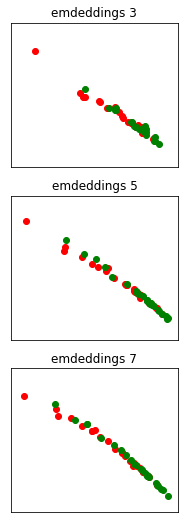

In [38]:
from sklearn.decomposition import TruncatedSVD

links = ["emdeddings_length_3.csv", "emdeddings_length_5.csv", "emdeddings_length_7.csv"]
n = 3
target = "targets 22.03.2018.csv"
par = 'vertically'
#par = 'horizontally'

method = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=0, random_state=75)
func(n, links, target, par, method)

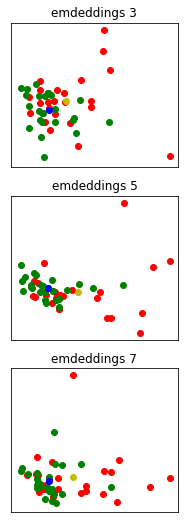

In [17]:
from sklearn.decomposition import FactorAnalysis

links = ["emdeddings_length_3.csv", "emdeddings_length_5.csv", "emdeddings_length_7.csv"]
n = 3
target = "targets 22.03.2018.csv"
par = 'vertically'
#par = 'horizontally'
method = FactorAnalysis(n_components=2, svd_method='randomized', iterated_power=0, random_state=31)
func(n, links, target, par, method)  

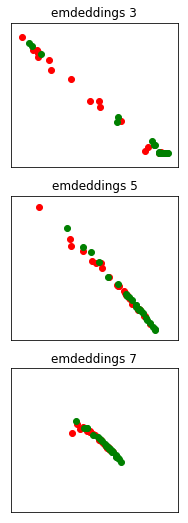

In [57]:
from sklearn.decomposition import NMF

links = ["emdeddings_length_3.csv", "emdeddings_length_5.csv", "emdeddings_length_7.csv"]
n = 3
target = "targets 22.03.2018.csv"
par = 'vertically'
#par = 'horizontally'
method = NMF(n_components=2, init='random', solver='cd', 
                                 alpha=0, l1_ratio=1, random_state=25)
func(n, links, target, par, method)
#print(max_dist, init[best_i], solver[best_j], betalos[best_k], best_p, best_q, best_o, iter_num)

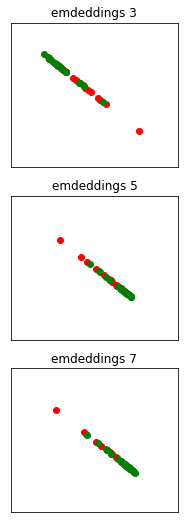

In [199]:
from sklearn.decomposition import LatentDirichletAllocation

links = ["emdeddings_length_3.csv", "emdeddings_length_5.csv", "emdeddings_length_7.csv"]
n = 3
target = "targets 22.03.2018.csv"
par = 'vertically'
#par = 'horizontally'

method = LatentDirichletAllocation(n_components=2,doc_topic_prior=i, doc_topic_prior=j)
func(n, links, target, par, method)

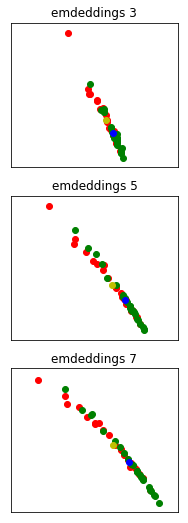

0.00200041383454169


In [14]:
from sklearn.decomposition import MiniBatchDictionaryLearning

links = ["emdeddings_length_3.csv", "emdeddings_length_5.csv", "emdeddings_length_7.csv"]
n = 3
target = "targets 22.03.2018.csv"
par = 'vertically'
#par = 'horizontally'
method = MiniBatchDictionaryLearning(n_components=2, alpha=0, n_iter=0, fit_algorithm='lars', 
                                     transform_algorithm='lasso_lars', transform_alpha=0, random_state=26)
func(n, links, target, par, method)
print(dist)

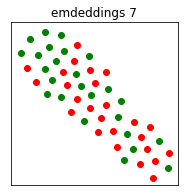

In [10]:
from sklearn.manifold import TSNE

links = [ "emdeddings_length_7.csv"]
n = 1
target = "targets 22.03.2018.csv"
par = 'vertically'
#par = 'horizontally'
method = TSNE(n_components=2)
func(n, links, target, par, method)

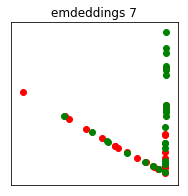

In [11]:
from sklearn.manifold import LocallyLinearEmbedding

links = [ "emdeddings_length_7.csv"]
n = 1
target = "targets 22.03.2018.csv"
par = 'vertically'
#par = 'horizontally'
method = LocallyLinearEmbedding(n_components=2)
func(n, links, target, par, method)